In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfex=pd.read_csv(r"C:\Users\LENOVO\Desktop\Excelr\Projects\India Trade\2010_2021_HS2_export.csv")
dfim=pd.read_csv(r"C:\Users\LENOVO\Desktop\Excelr\Projects\India Trade\2010_2021_HS2_import.csv")

In [3]:
dfex.head(10)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010
5,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,0.17,AFGHANISTAN,2010
6,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,0.12,AFGHANISTAN,2010
7,9,"COFFEE, TEA, MATE AND SPICES.",4.00,AFGHANISTAN,2010
8,10,CEREALS.,0.03,AFGHANISTAN,2010
9,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.01,AFGHANISTAN,2010


In [4]:
dfim.head(10)

,HSCode,Commodity,value,country,year
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010
5,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.00,AFGHANISTAN,2010
6,18,COCOA AND COCOA PREPARATIONS.,0.00,AFGHANISTAN,2010
7,20,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",0.01,AFGHANISTAN,2010
8,25,SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...,1.05,AFGHANISTAN,2010
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.00,AFGHANISTAN,2010


In [5]:
dfex.isnull().sum()

HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

In [6]:
dfim.isnull().sum()

HSCode           0
Commodity        0
value        15745
country          0
year             0
dtype: int64

In [7]:
dfex.country.nunique()

249

In [8]:
dfim.country.nunique()

243

In [9]:
#for cleaning both dataframes writing a function
def clean(ex_df):
    ex_df['country'] = ex_df['country'].apply(lambda x : np.NaN if x == 'UNSPECIFIED' else x )
    ex_df = ex_df[ex_df['value']!=0]
    ex_df.dropna(inplace = True)
    return ex_df

In [10]:
dfex = clean(dfex)
deim = clean(dfim)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10820\565457878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df.dropna(inplace = True)


In [11]:
print(dfex.isnull().sum())
print('-------------')
print(dfim.isnull().sum())

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64
-------------
HSCode           0
Commodity        0
value        15745
country       1033
year             0
dtype: int64


In [12]:
df1=pd.DataFrame(dfex)
df2=pd.DataFrame(dfim)

In [13]:
df1

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
5,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,0.17,AFGHANISTAN,2010
6,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,0.12,AFGHANISTAN,2010
...,...,...,...,...,...
184749,91,CLOCKS AND WATCHES AND PARTS THEREOF.,0.01,ZIMBABWE,2021
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021


## Top 3 trading partners of India over the years

In [41]:
#Export
top_3_values_ex = df1.groupby(['year','country'])['value'].sum().groupby('year', group_keys=False).nlargest(3)
top_3_values_ex = top_3_values_ex.reset_index()
top_3_values_ex

,year,country,value
0,2010,U ARAB EMTS,33822.08
1,2010,U S A,25291.56
2,2010,CHINA P RP,14168.65
3,2011,U ARAB EMTS,35925.23
4,2011,U S A,34741.33
5,2011,CHINA P RP,18076.34
6,2012,U ARAB EMTS,36316.29
7,2012,U S A,36154.88
8,2012,SINGAPORE,13619.00
9,2013,U S A,39141.81


In [45]:
#Import
top_3_values_im = df2.groupby(['year','country'])['value'].sum().groupby('year',group_keys=False).nlargest(3)
top_3_values_im = top_3_values_im.reset_index()
top_3_values_im

,year,country,value
0,2010,CHINA P RP,43479.39
1,2010,U ARAB EMTS,32753.02
2,2010,SWITZERLAND,24801.84
3,2011,CHINA P RP,55313.17
4,2011,U ARAB EMTS,36756.16
5,2011,SWITZERLAND,34758.81
6,2012,CHINA P RP,52247.97
7,2012,U ARAB EMTS,39138.21
8,2012,SAUDI ARAB,33998.05
9,2013,CHINA P RP,51034.30


## Top 10 commodities exported and imported by India

In [16]:
# Export
top_10_commodities_ex = df1.groupby('Commodity')['value'].agg(['sum','count']).rename(columns={'sum':'Total Value','count':'Value Count'})
top_10_commodities_ex =top_10_commodities_ex.sort_values(by='Total Value',ascending=False)
top_10_commodities_ex = top_10_commodities_ex.head(10)
top_10_commodities_ex

,Total Value,Value Count
Commodity,,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",547514.12,1781
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",477223.78,1871
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",188914.19,2416
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",174573.86,2313
ORGANIC CHEMICALS,170194.93,2094
PHARMACEUTICAL PRODUCTS,156570.14,2421
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",139167.64,2332
IRON AND STEEL,120779.33,2039
CEREALS.,97624.00,1838


In [17]:
#Import
top_10_commodities_ex = df2.groupby('Commodity')['value'].agg(['sum','count'])
top_10_commodities_ex = top_10_commodities_ex.rename(columns={'sum':'Total Value','count':'Total Count'})
top_10_commodities_ex = top_10_commodities_ex.sort_values(by='Total Value', ascending=False).head(10)
top_10_commodities_ex

,Total Value,Total Count
Commodity,,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1756299.54,1329
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",813961.33,1321
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",485408.24,2081
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",441796.29,1970
ORGANIC CHEMICALS,218286.99,1290
PLASTIC AND ARTICLES THEREOF.,147087.63,1712
IRON AND STEEL,133851.71,1828
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,131471.56,749
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",94703.59,1626


## Countries from where the maximum import and export happen to and from India

In [18]:
#export
cex = df1.groupby('country')[['value']].sum().nlargest(10,'value','all')
cex

,value
country,
U S A,541487.45
U ARAB EMTS,362951.83
CHINA P RP,180865.06
HONG KONG,147807.24
SINGAPORE,130427.76
U K,107298.44
GERMANY,95153.81
NETHERLAND,93963.12
BANGLADESH PR,89520.36


<function matplotlib.pyplot.show(close=None, block=None)>

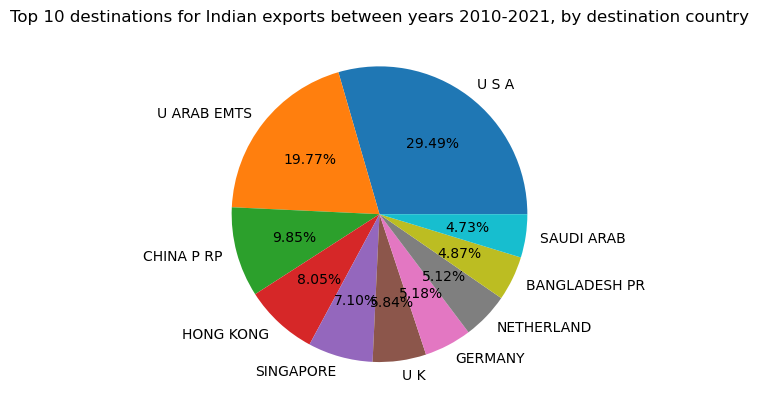

In [19]:
plt.pie(cex['value'],labels = cex.index, autopct = '%1.2f%%')
plt.title('Top 10 destinations for Indian exports between years 2010-2021, by destination country')
plt.show

In [43]:
#Import
cim = df2.groupby('country')[['value']].sum().nlargest(10,'value')
cim

,value
country,
CHINA P RP,757219.93
U ARAB EMTS,357998.58
U S A,327297.77
SAUDI ARAB,318699.57
SWITZERLAND,265251.74
IRAQ,212430.61
INDONESIA,173398.95
KOREA RP,167052.86
GERMANY,161966.07


<function matplotlib.pyplot.show(close=None, block=None)>

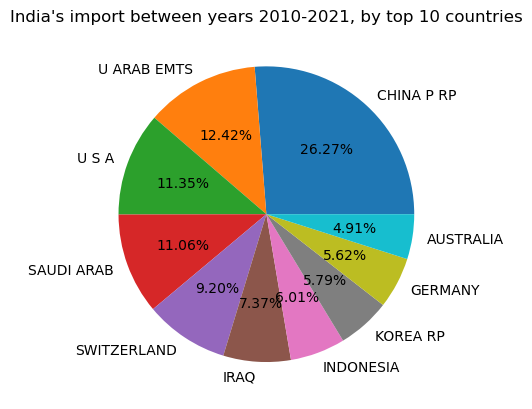

In [21]:
plt.pie(cim['value'],labels = cim.index, autopct = '%1.2f%%')
plt.title("India's import between years 2010-2021, by top 10 countries")
plt.show

## Import Export and Deficit over the years

In [22]:
df3 = df1.groupby('year').agg({'value': 'sum'})
df4 = df2.groupby('year').agg({'value': 'sum'})

In [23]:
df3['Value_Import']=df4['value']
df3['Deficit']=df3['value']-df4['value']

In [24]:
df3=df3.rename(columns={'value':'Value_Export'})

In [25]:
df3

,Value_Export,Value_Import,Deficit
year,,,
2010,235411.01,369762.25,-134351.24
2011,289511.58,489311.81,-199800.23
2012,294946.87,490730.07,-195783.20
2013,302844.13,450192.99,-147348.86
2014,306159.80,448026.63,-141866.83
2015,259791.42,381000.97,-121209.55
2016,273365.16,384350.29,-110985.13
2017,301078.18,465574.02,-164495.84
2018,327151.43,514071.33,-186919.90


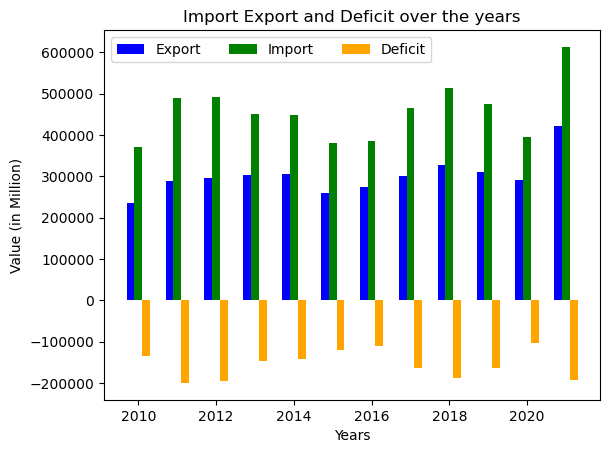

In [26]:
width = 0.2
fig,ax = plt.subplots()

ax.bar(df3.index-width,df3['Value_Export'],width,label='Export', color='blue' )
ax.bar(df3.index,df3['Value_Import'],width,label='Import', color='green')
ax.bar(df3.index+width,df3['Deficit'],width,label='Deficit', color='orange')

plt.title('Import Export and Deficit over the years')
plt.ylabel('Value (in Million)')
plt.xlabel('Years')
plt.legend(loc='best',ncol=3)

## Changes in trade between India and Quad countries over the years

In [27]:
#Japan
japan_ex = df1[df1['country']=='JAPAN'].groupby(['year','country']).agg({'value':'sum'})
japan_im = df2[df2['country']=='JAPAN'].groupby(['year','country']).agg({'value':'sum'})

japan=pd.DataFrame()
japan['Exports'] = japan_ex['value']
japan['Imports'] = japan_im['value']
japan['Deficit'] = japan_ex['value'] - japan_im['value']
japan.reset_index(inplace=True)
japan

,year,country,Exports,Imports,Deficit
0,2010,JAPAN,5090.99,8631.80,-3540.81
1,2011,JAPAN,6328.32,11999.21,-5670.89
2,2012,JAPAN,6099.84,12412.06,-6312.22
3,2013,JAPAN,6813.89,9480.51,-2666.62
4,2014,JAPAN,5385.39,10131.07,-4745.68
5,2015,JAPAN,4662.67,9849.99,-5187.32
6,2016,JAPAN,3845.55,9754.45,-5908.90
7,2017,JAPAN,4734.00,10973.14,-6239.14
8,2018,JAPAN,4861.50,12772.43,-7910.93
9,2019,JAPAN,4520.00,12434.43,-7914.43


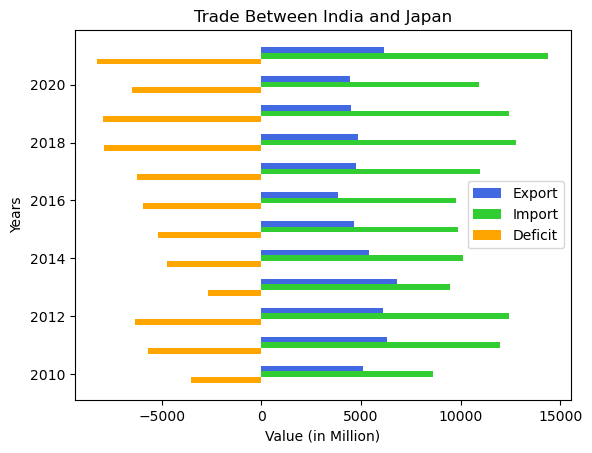

In [28]:
fig,ax = plt.subplots()
width=0.2

ax.barh(japan['year']+width,japan['Exports'],width, label='Export', color='royalblue')
ax.barh(japan['year'],japan['Imports'],width, label='Import', color='limegreen')
ax.barh(japan['year']-width,japan['Deficit'], width, label='Deficit', color='orange')
plt.title('Trade Between India and Japan')
plt.xlabel('Value (in Million)')
plt.ylabel('Years')
plt.legend()
plt.show()


In [29]:
#USA
usa_ex = df1[df1['country']=='U S A'].groupby(['year','country']).agg({'value':'sum'})
usa_im = df2[df2['country']=='U S A'].groupby(['year','country']).agg({'value':'sum'})

usa=pd.DataFrame()
usa['Exports'] = usa_ex['value']
usa['Imports'] = usa_im['value']
usa['Deficit'] = usa_ex['value'] - usa_im['value']
usa.reset_index(inplace=True)
usa

,year,country,Exports,Imports,Deficit
0,2010,U S A,25291.56,20050.41,5241.15
1,2011,U S A,34741.33,23454.64,11286.69
2,2012,U S A,36154.88,25204.39,10950.49
3,2013,U S A,39141.81,22504.79,16637.02
4,2014,U S A,42448.30,21814.27,20634.03
5,2015,U S A,40335.68,21781.06,18554.62
6,2016,U S A,42211.96,22307.18,19904.78
7,2017,U S A,47878.17,26610.72,21267.45
8,2018,U S A,52405.88,35549.20,16856.68
9,2019,U S A,53088.43,35819.55,17268.88


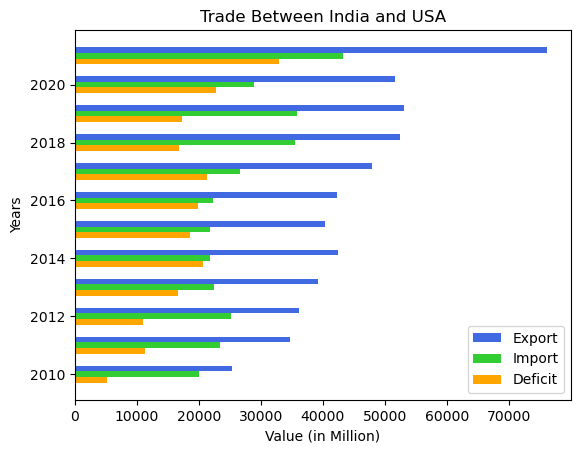

In [30]:
fig,ax = plt.subplots()
width=0.2

ax.barh(usa['year']+width,usa['Exports'],width, label='Export', color='royalblue')
ax.barh(usa['year'],usa['Imports'],width, label='Import', color='limegreen')
ax.barh(usa['year']-width,usa['Deficit'], width, label='Deficit', color='orange')
plt.title('Trade Between India and USA')
plt.xlabel('Value (in Million)')
plt.ylabel('Years')
plt.legend()
plt.show()


In [31]:
#Australia
aus_ex = df1[df1['country']=='AUSTRALIA'].groupby(['year','country']).agg({'value':'sum'})
aus_im = df2[df2['country']=='AUSTRALIA'].groupby(['year','country']).agg({'value':'sum'})

aus=pd.DataFrame()
aus['Exports'] = aus_ex['value']
aus['Imports'] = aus_im['value']
aus['Deficit'] = aus_ex['value'] - aus_im['value']
aus.reset_index(inplace=True)
aus

,year,country,Exports,Imports,Deficit
0,2010,AUSTRALIA,1712.80,10788.94,-9076.14
1,2011,AUSTRALIA,2476.60,15578.41,-13101.81
2,2012,AUSTRALIA,2348.37,13085.57,-10737.20
3,2013,AUSTRALIA,2300.03,9822.38,-7522.35
4,2014,AUSTRALIA,2781.90,10247.14,-7465.24
5,2015,AUSTRALIA,3262.74,8898.74,-5636.00
6,2016,AUSTRALIA,2957.56,11154.37,-8196.81
7,2017,AUSTRALIA,4012.07,13993.62,-9981.55
8,2018,AUSTRALIA,3520.22,13131.07,-9610.85
9,2019,AUSTRALIA,2851.90,9782.05,-6930.15


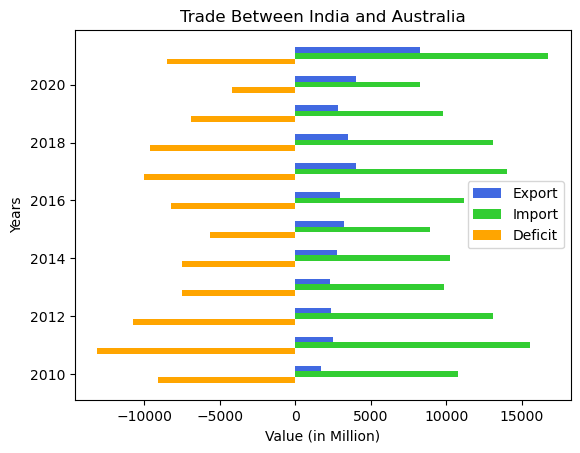

In [32]:
fig,ax = plt.subplots()
width=0.2

ax.barh(aus['year']+width,aus['Exports'],width, label='Export', color='royalblue')
ax.barh(aus['year'],aus['Imports'],width, label='Import', color='limegreen')
ax.barh(aus['year']-width,aus['Deficit'], width, label='Deficit', color='orange')
plt.title('Trade Between India and Australia')
plt.xlabel('Value (in Million)')
plt.ylabel('Years')
plt.legend()
plt.show()


## Trade between India and China countries over the years 

In [33]:
china_ex = df1[df1['country']=='CHINA P RP'].groupby(['year','country']).agg({'value':'sum'})
china_im = df2[df2['country']=='CHINA P RP'].groupby(['year','country']).agg({'value':'sum'})

china=pd.DataFrame()
china['Exports'] = china_ex['value']
china['Imports'] = china_im['value']
china['Deficit'] = china_ex['value']-china_im['value']
china.reset_index(inplace=True)
china

,year,country,Exports,Imports,Deficit
0,2010,CHINA P RP,14168.65,43479.39,-29310.74
1,2011,CHINA P RP,18076.34,55313.17,-37236.83
2,2012,CHINA P RP,13534.66,52247.97,-38713.31
3,2013,CHINA P RP,14824.16,51034.30,-36210.14
4,2014,CHINA P RP,11934.07,60412.84,-48478.77
5,2015,CHINA P RP,9011.19,61707.54,-52696.35
6,2016,CHINA P RP,10171.66,61282.66,-51111.00
7,2017,CHINA P RP,13333.33,76380.35,-63047.02
8,2018,CHINA P RP,16751.94,70319.29,-53567.35
9,2019,CHINA P RP,16612.52,65260.38,-48647.86


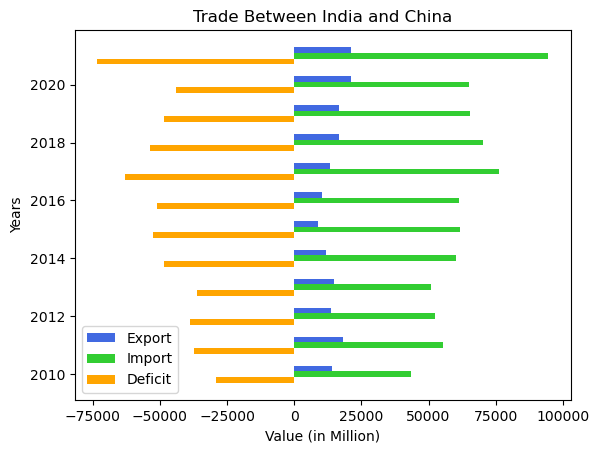

In [34]:
fig,ax = plt.subplots()
width=0.2

ax.barh(china['year']+width,china['Exports'],width, label='Export', color='royalblue')
ax.barh(china['year'],china['Imports'],width, label='Import', color='limegreen')
ax.barh(china['year']-width,china['Deficit'], width, label='Deficit', color='orange')
plt.title('Trade Between India and China')
plt.xlabel('Value (in Million)')
plt.ylabel('Years')
plt.legend()
plt.show()